# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment

### Problem Statement:

A US bike-sharing provider **`BoomBikes`** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **`BoomBikes`** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal:
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

`The solution is divided into the following sections:`
- `Importing Libraries`
- `Data understanding and exploration`
- `Data Visualisation`
- `Data preparation`
- `Splitting the Data into Training and Testing Sets`
- `Training the model`
- `Residual Analysis`
- `Making Predictions Using the Final Model`

### Step 1:- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 2:- Data Understanding and Exploration

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike.shape

(730, 16)

#### Data Cleaning and Manipulation

In [7]:
# Assigning string values to different seasons instead of numeric values.

# 1 = spring
# 2 = summer
# 3 = fall
# 4 = winter

bike[['season']]= bike[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [8]:
# Assigning string values to different months instead of numeric values
bike[['mnth']] = bike[['mnth']].apply(lambda x: x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))

In [9]:
# Assigning string values to different weekday instead of numeric values
bike[['weekday']]= bike[['weekday']].apply(lambda x: x.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}))

In [10]:
# Assigning string values to different weathersit instead of numeric values
bike[['weathersit']]= bike[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}))

In [11]:
bike.head()

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring   0  jan        0     sat           0   
1        2  02-01-2018  spring   0  jan        0     sun           0   
2        3  03-01-2018  spring   0  jan        0     mon           1   
3        4  04-01-2018  spring   0  jan        0     tue           1   
4        5  05-01-2018  spring   0  jan        0     wed           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1      Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [12]:
# Remove unwanted columns:-
# Remove instant as it contains only indexes
# Remove dteday as we have mnth and yr alreeady

bike.drop(['instant','dteday'],axis=1,inplace=True)

In [13]:
bike.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0      Misty  14.110847   
1  spring   0  jan        0     sun           0      Misty  14.902598   
2  spring   0  jan        0     mon           1      Clear   8.050924   
3  spring   0  jan        0     tue           1      Clear   8.200000   
4  spring   0  jan        0     wed           1      Clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

### Step 3:- Data Visualisation

Visualising the data is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

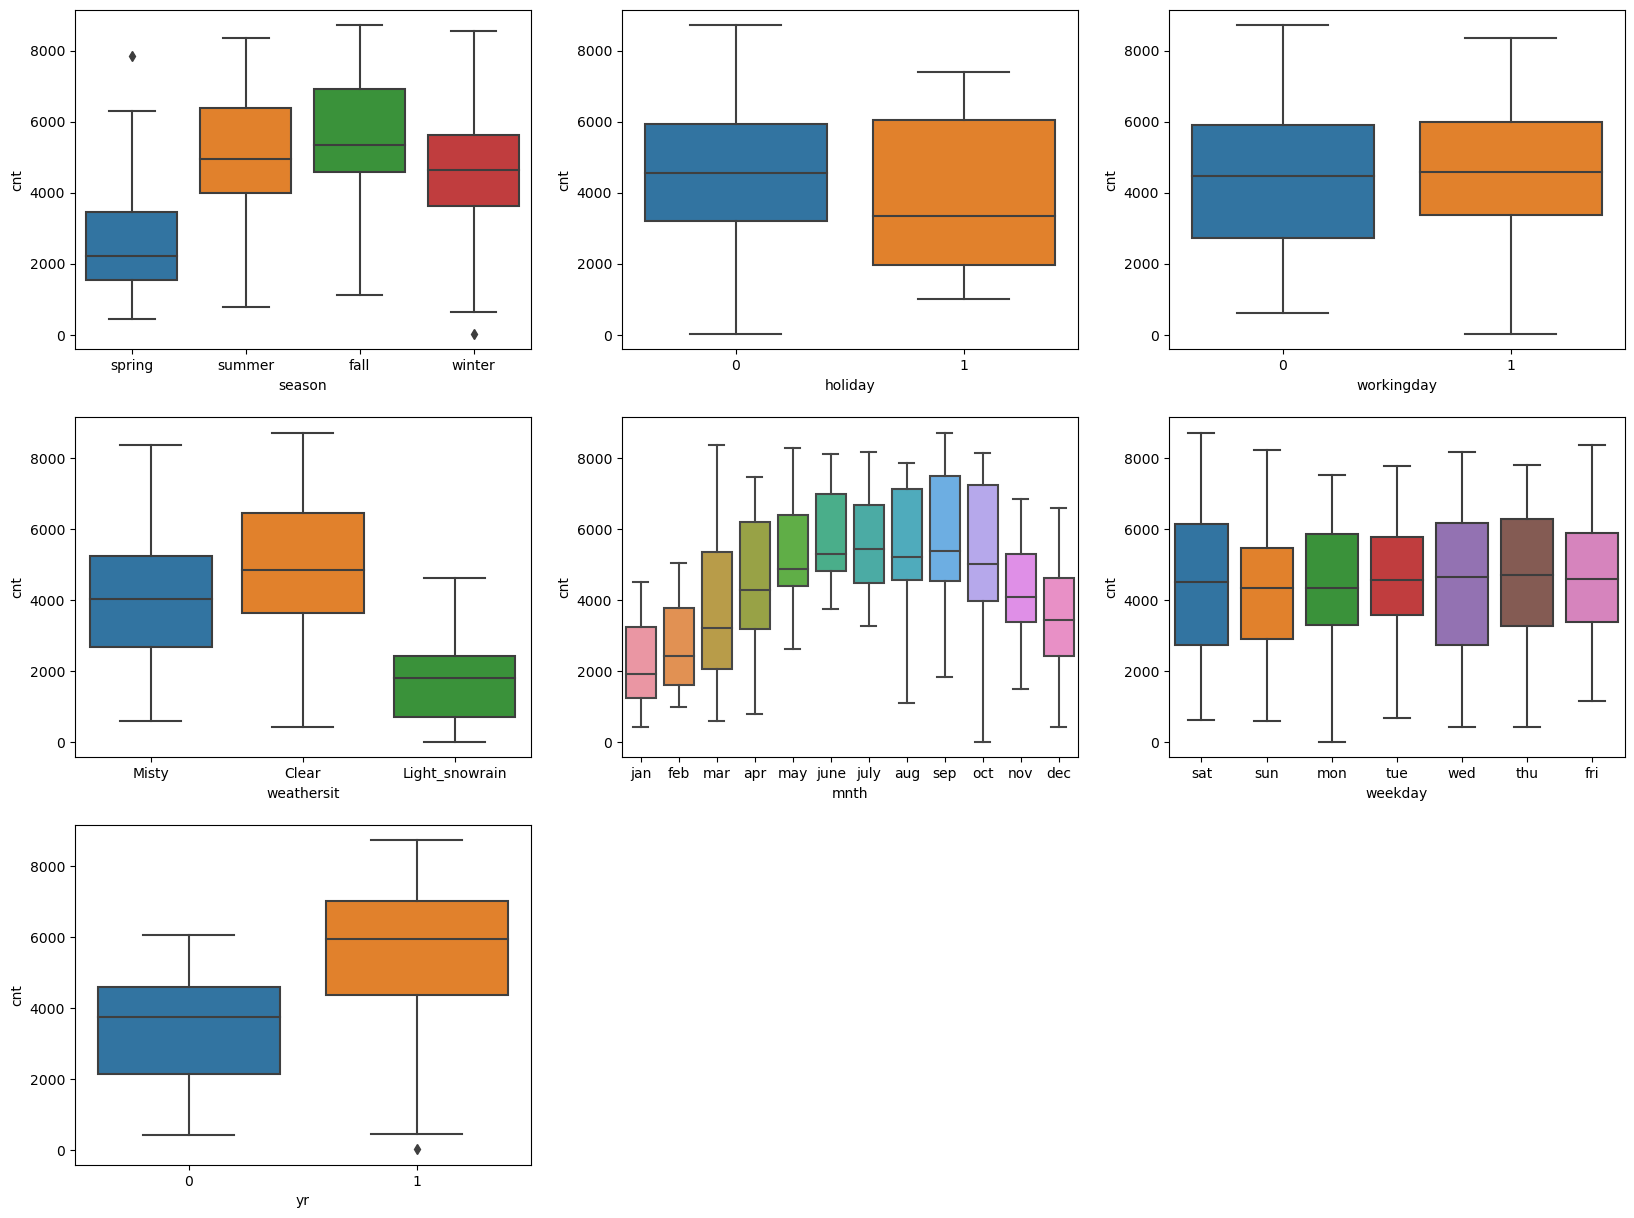

In [14]:
plt.figure(figsize=(20, 15))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

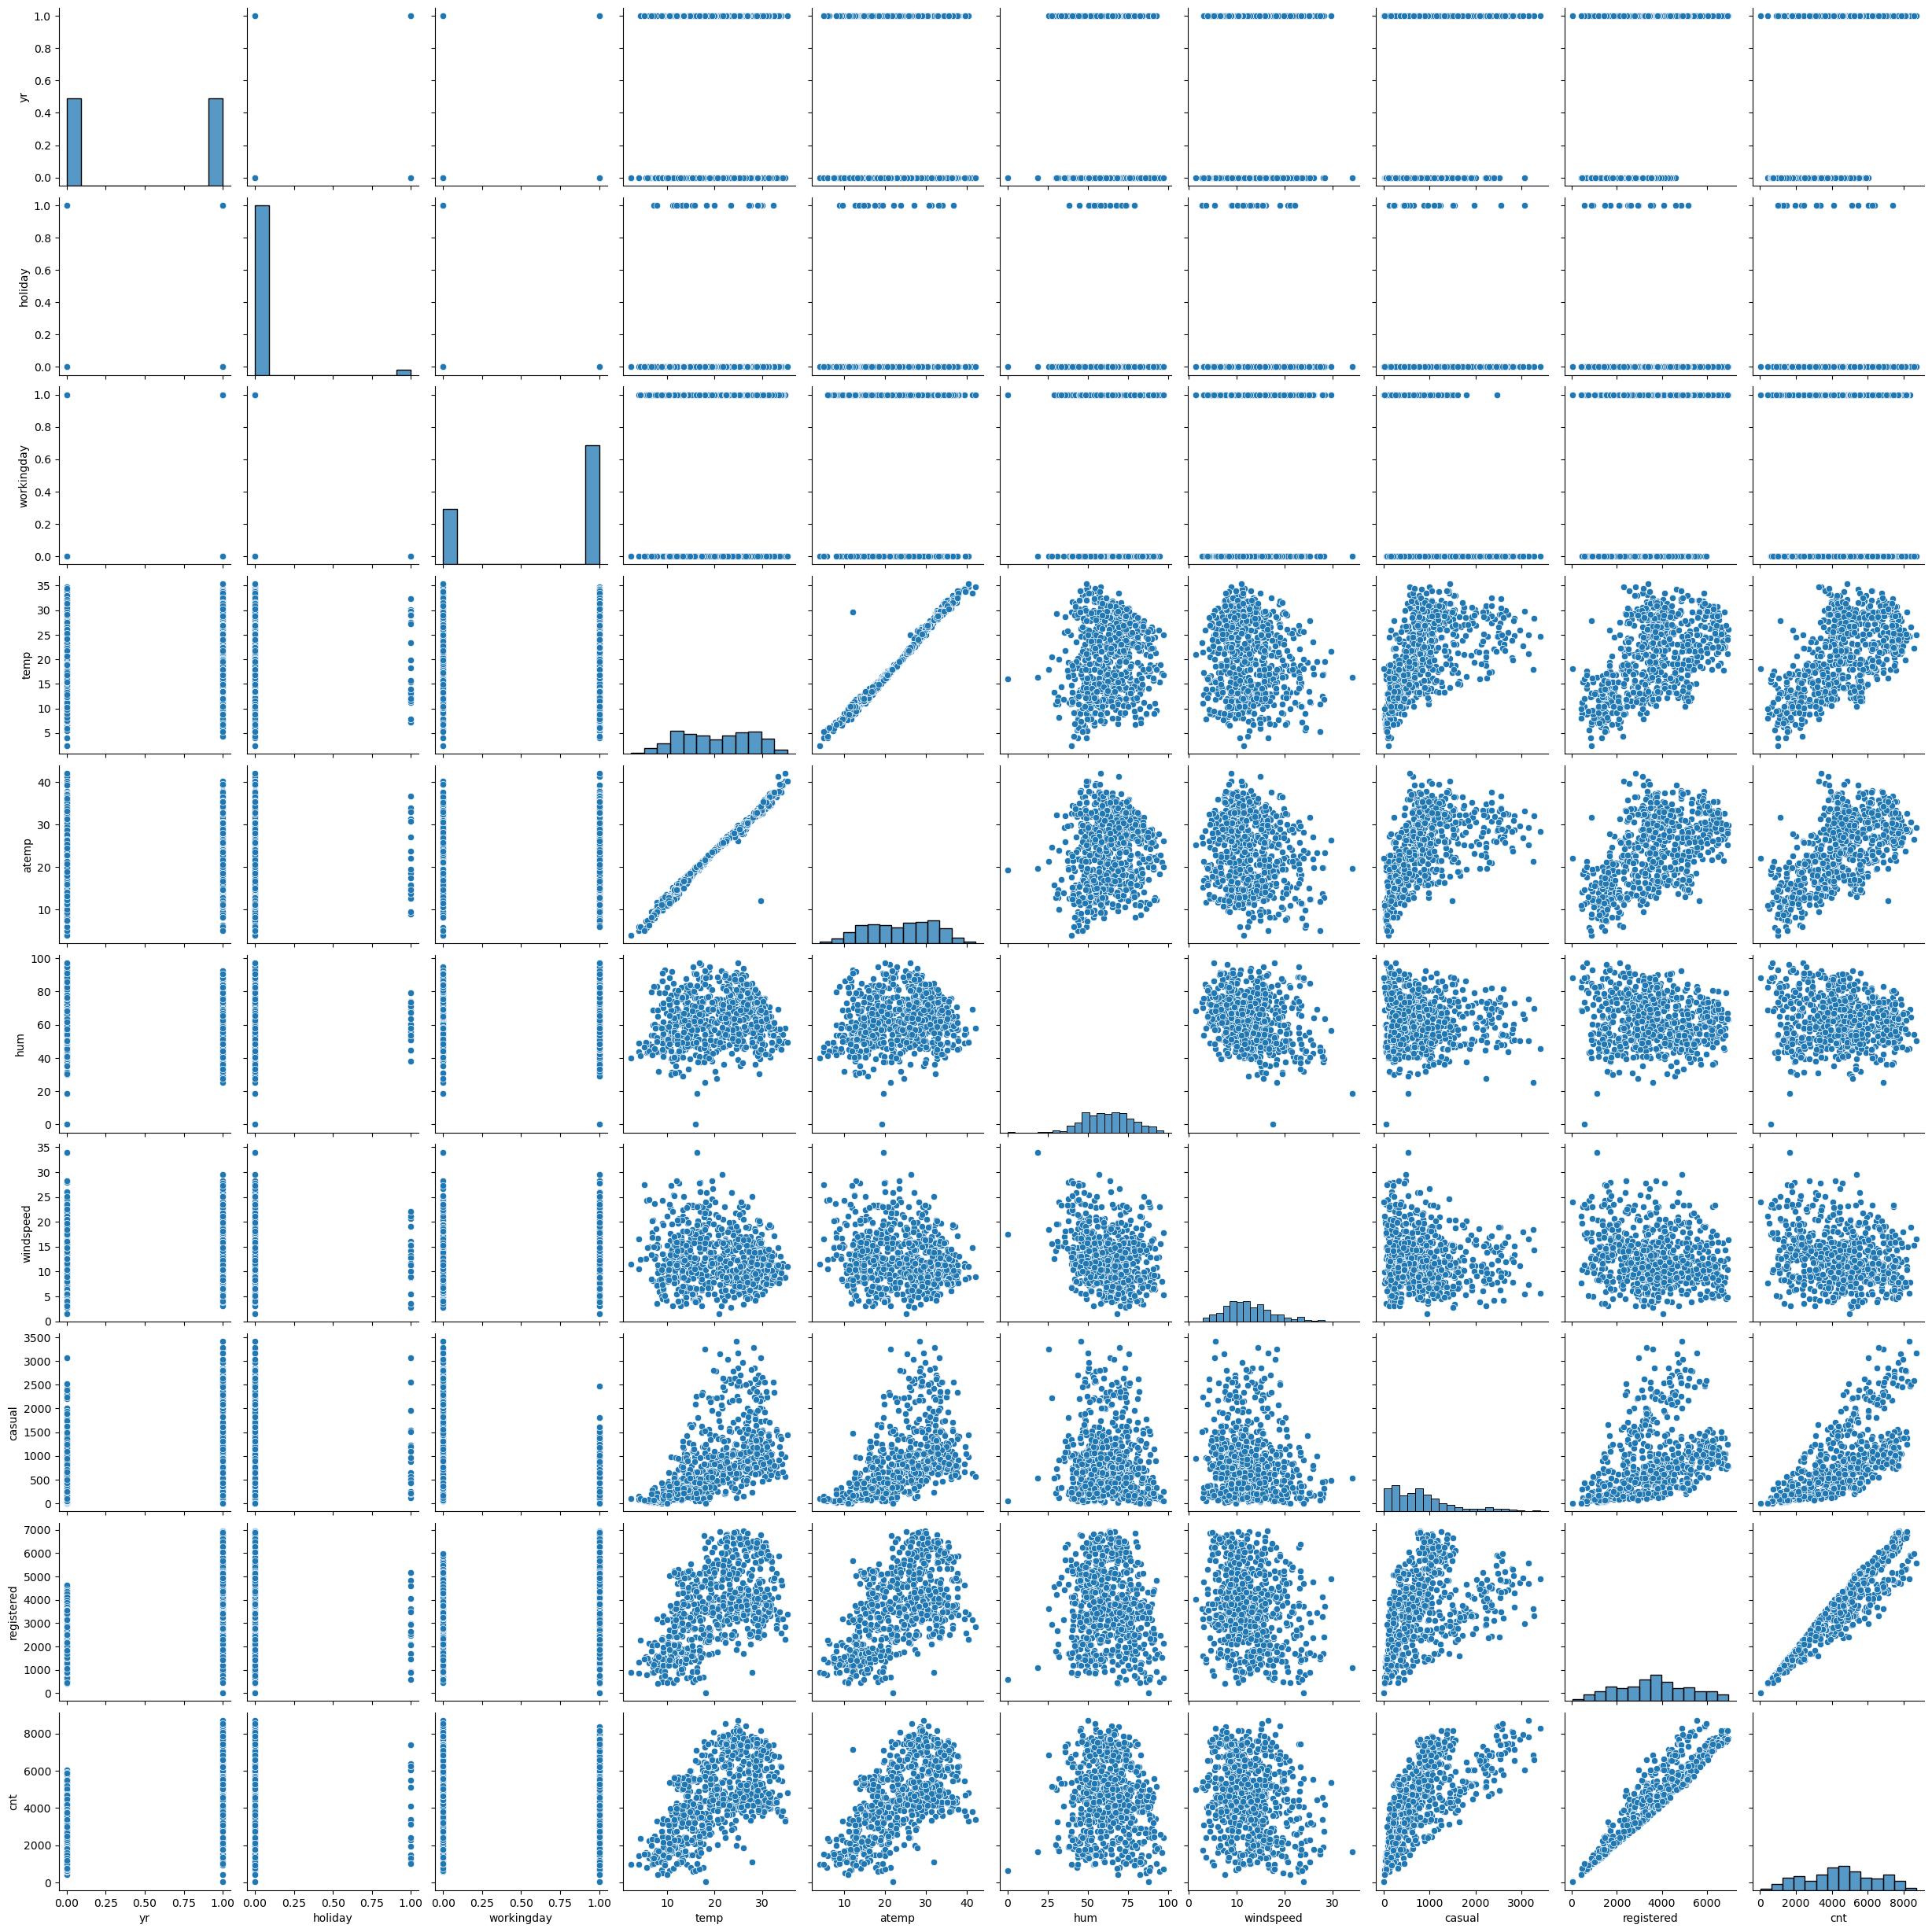

In [15]:
sns.pairplot(bike)
plt.show()

In [16]:
bike_numeric = bike[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
bike_numeric.head()

temp     atemp      hum  windspeed  casual  registered   cnt
0  14.110847  18.18125  80.5833  10.749882     331         654   985
1  14.902598  17.68695  69.6087  16.652113     131         670   801
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

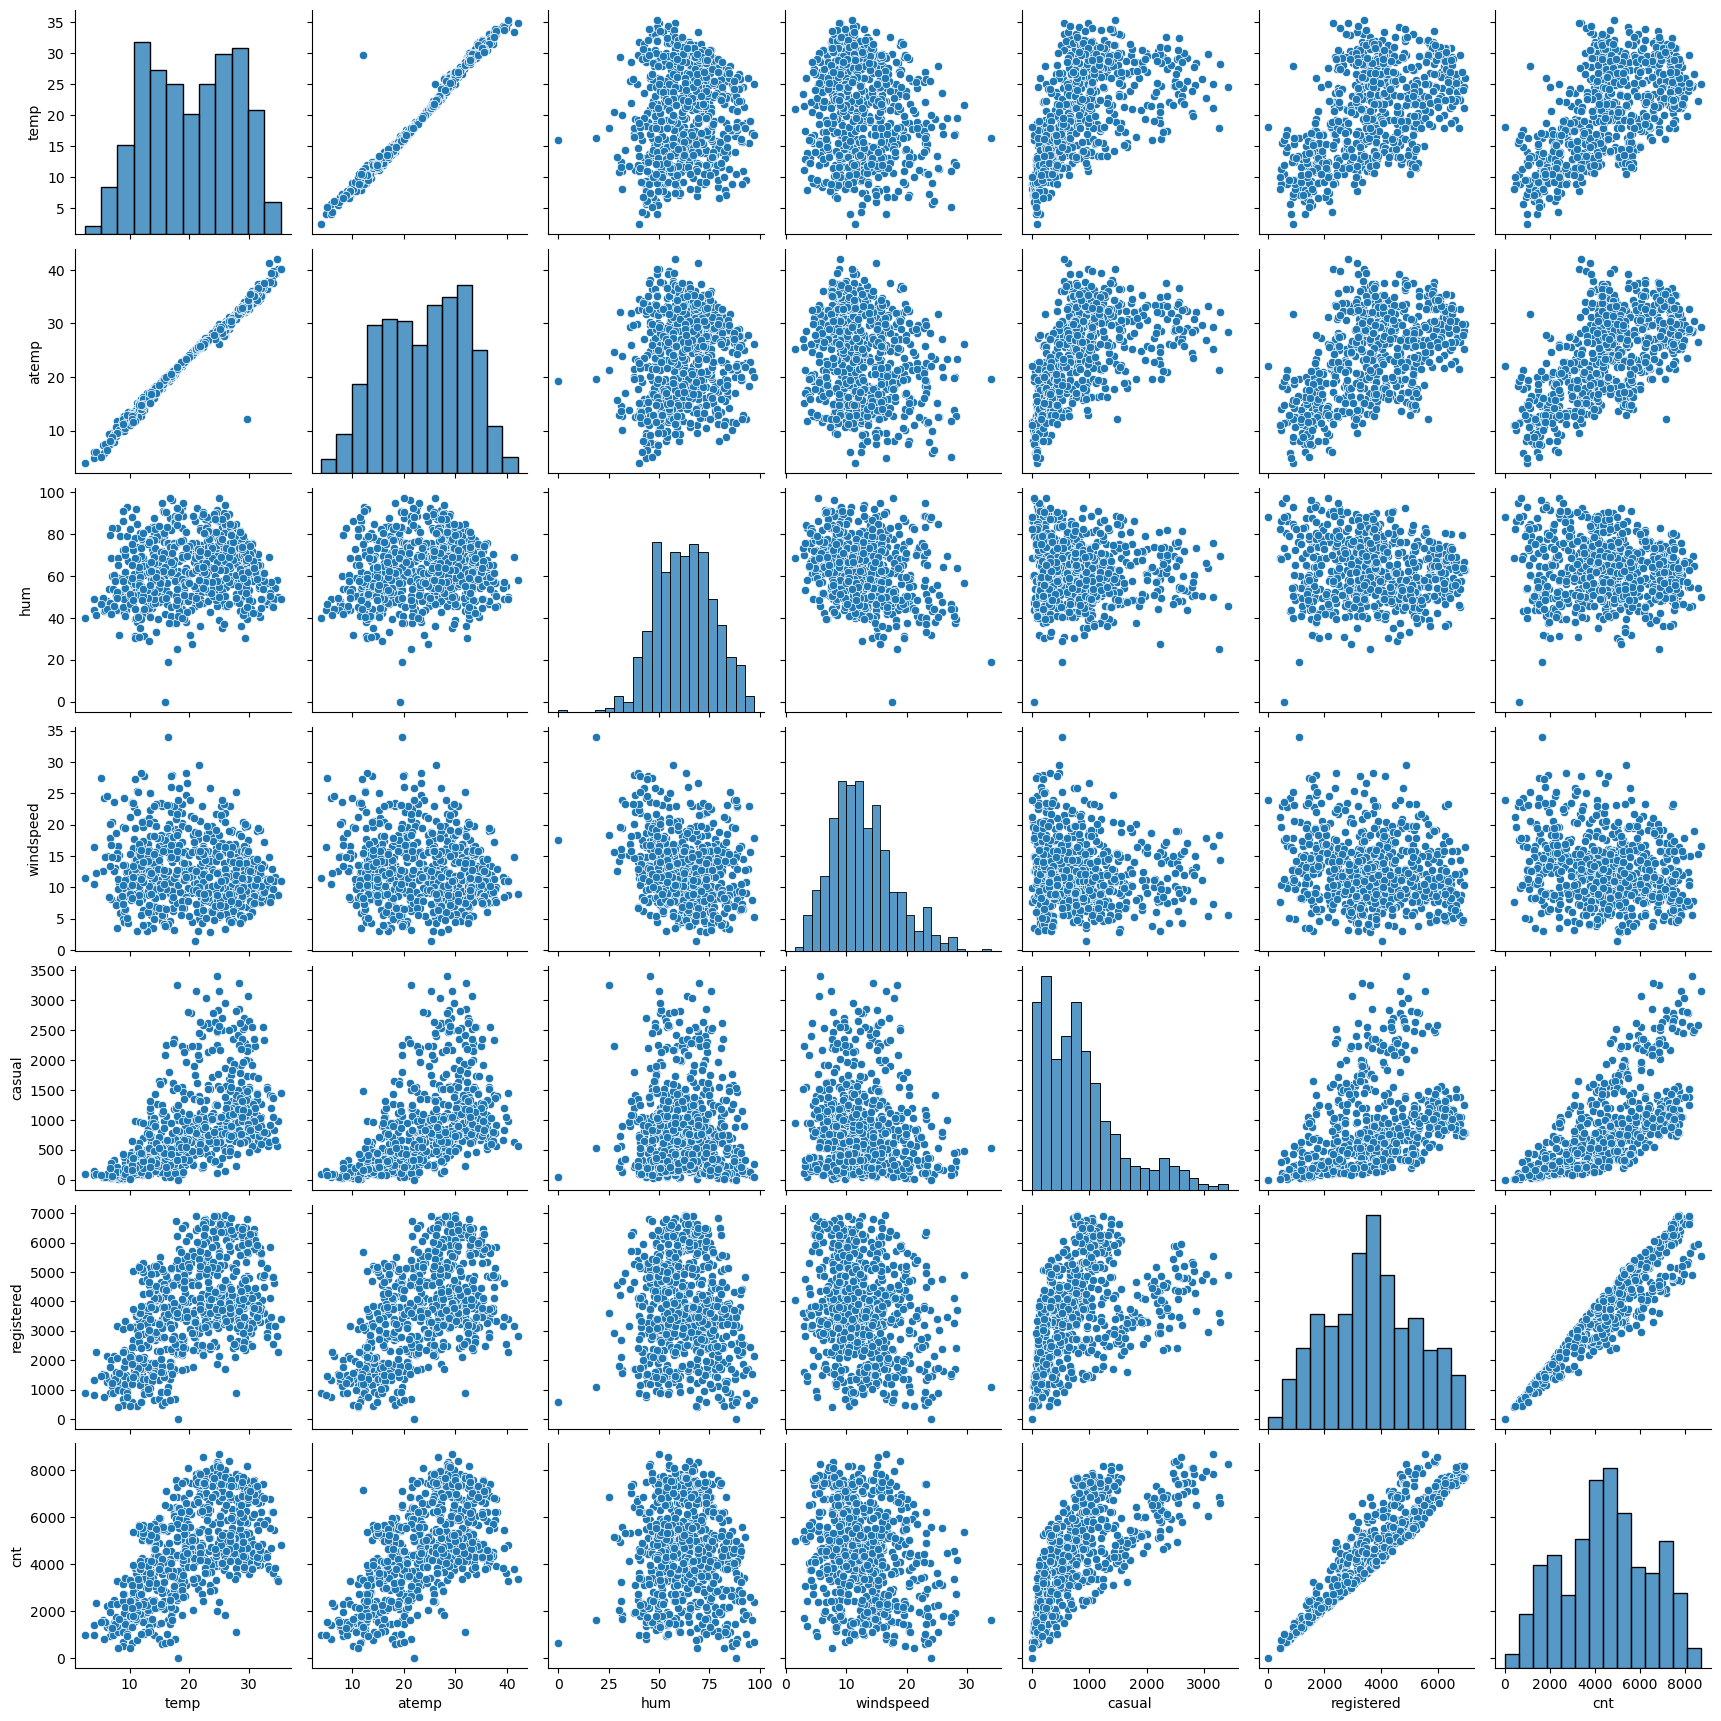

In [17]:
sns.pairplot(bike_numeric)
plt.show()

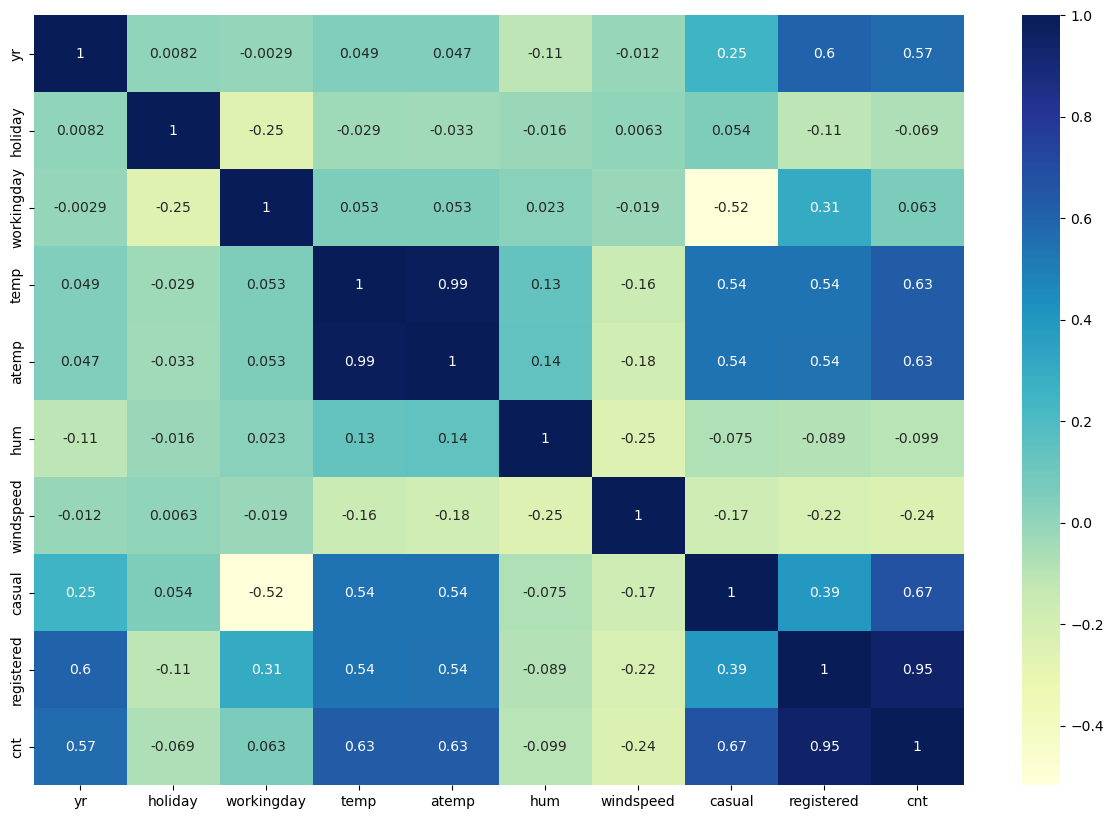

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(bike.corr(),cmap="YlGnBu",annot=True)
plt.show()

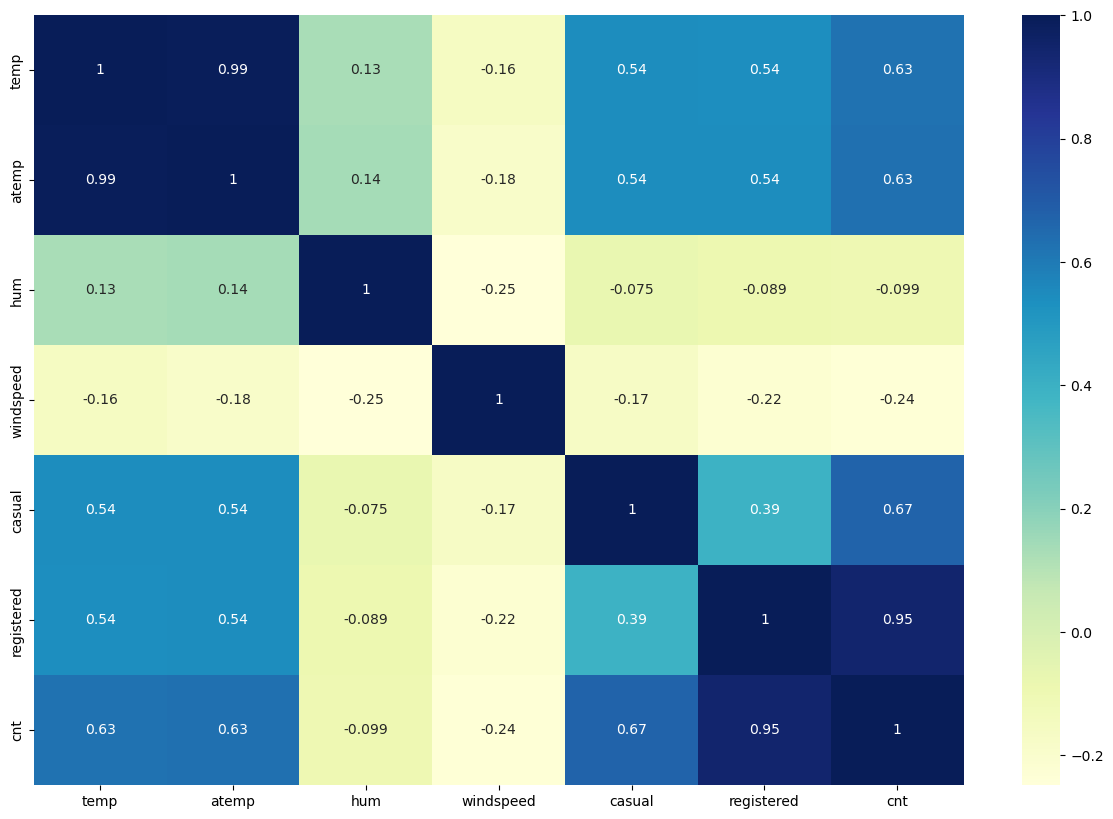

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_numeric.corr(),cmap="YlGnBu",annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- cnt is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [20]:
# Removing atemp as it is highly correlated with temp
bike.drop(['atemp'],axis=1,inplace=True)    

In [21]:
bike.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.465405    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Step 4:- Data Preparation 

Encoding categorical vars to dummy vars

In [22]:
bike_dummies = pd.get_dummies(bike[['season', 'mnth', 'weekday', 'weathersit']])
bike_dummies.head()

season_fall  season_spring  season_summer  season_winter  mnth_apr  \
0            0              1              0              0         0   
1            0              1              0              0         0   
2            0              1              0              0         0   
3            0              1              0              0         0   
4            0              1              0              0         0   

   mnth_aug  mnth_dec  mnth_feb  mnth_jan  mnth_july  ...  weekday_fri  \
0         0         0         0         1          0  ...            0   
1         0         0         0         1          0  ...            0   
2         0         0         0         1          0  ...            0   
3         0         0         0         1          0  ...            0   
4         0         0         0         1          0  ...            0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            0            1            0            0            0   
1            0            0            1            0            0   
2            1            0            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            0   

   weekday_wed  weathersit_Clear  weathersit_Light_snowrain  weathersit_Misty  
0            0                 0                          0                 1  
1            0                 0                          0                 1  
2            0                 1                          0                 0  
3            0                 1                          0                 0  
4            1                 1                          0                 0  

[5 rows x 26 columns]

In [23]:
bike_dummies = pd.get_dummies(bike[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)
bike_dummies.head()

season_spring  season_summer  season_winter  mnth_aug  mnth_dec  mnth_feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_jan  mnth_july  mnth_june  mnth_mar  ...  mnth_oct  mnth_sep  \
0         1          0          0         0  ...         0         0   
1         1          0          0         0  ...         0         0   
2         1          0          0         0  ...         0         0   
3         1          0          0         0  ...         0         0   
4         1          0          0         0  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            0            1            0            0            0   
1            0            0            1            0            0   
2            1            0            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            0   

   weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
0            0                          0                 1  
1            0                          0                 1  
2            0                          0                 0  
3            0                          0                 0  
4            1                          0                 0  

[5 rows x 22 columns]

In [24]:
# drop the categorical vars as we created dummy vars already
bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1,inplace=True)

In [25]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed  casual  registered  \
0   0        0           0  14.110847  80.5833  10.749882     331         654   
1   0        0           0  14.902598  69.6087  16.652113     131         670   
2   0        0           1   8.050924  43.7273  16.636703     120        1229   
3   0        0           1   8.200000  59.0435  10.739832     108        1454   
4   0        0           1   9.305237  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [26]:
# Concat dummy vars with actual df
bike = pd.concat([bike, bike_dummies], axis=1)

In [27]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed  casual  registered  \
0   0        0           0  14.110847  80.5833  10.749882     331         654   
1   0        0           0  14.902598  69.6087  16.652113     131         670   
2   0        0           1   8.050924  43.7273  16.636703     120        1229   
3   0        0           1   8.200000  59.0435  10.739832     108        1454   
4   0        0           1   9.305237  43.6957  12.522300      82        1518   

    cnt  season_spring  ...  mnth_oct  mnth_sep  weekday_mon  weekday_sat  \
0   985              1  ...         0         0            0            1   
1   801              1  ...         0         0            0            0   
2  1349              1  ...         0         0            1            0   
3  1562              1  ...         0         0            0            0   
4  1600              1  ...         0         0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            0            0            0            0   
1            1            0            0            0   
2            0            0            0            0   
3            0            0            1            0   
4            0            0            0            1   

   weathersit_Light_snowrain  weathersit_Misty  
0                          0                 1  
1                          0                 1  
2                          0                 0  
3                          0                 0  
4                          0                 0  

[5 rows x 31 columns]

### Step 5:- Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [28]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [29]:
df_train

yr  holiday  workingday       temp      hum  windspeed  casual  \
576   1        0           1  29.246653  70.4167  11.083475     968   
426   1        0           0  16.980847  62.1250  10.792293     956   
728   1        0           0  10.489153  48.3333  23.500518     364   
482   1        0           0  15.443347  48.9583   8.708325    1120   
111   0        0           1  13.803347  72.9583  14.707907     177   
..   ..      ...         ...        ...      ...        ...     ...   
578   1        0           1  30.852500  65.9583   8.666718     983   
53    0        0           1   9.091299  42.3043   6.305571     139   
350   0        0           0  10.591653  56.0833  16.292189     275   
79    0        0           1  17.647835  73.7391  19.348461     401   
520   1        0           1  22.174153  61.3333  14.041525     968   

     registered   cnt  season_spring  ...  mnth_oct  mnth_sep  weekday_mon  \
576        6248  7216              0  ...         0         0            0   
426        3110  4066              1  ...         0         0            0   
728        1432  1796              1  ...         0         0            0   
482        3100  4220              0  ...         0         0            0   
111        1506  1683              0  ...         0         0            0   
..          ...   ...            ...  ...       ...       ...          ...   
578        6278  7261              0  ...         0         0            0   
53         1778  1917              1  ...         0         0            0   
350        2464  2739              0  ...         0         0            0   
79         1676  2077              0  ...         0         0            1   
520        6033  7001              0  ...         0         0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
576            0            0            0            1            0   
426            1            0            0            0            0   
728            0            1            0            0            0   
482            1            0            0            0            0   
111            0            0            0            0            0   
..           ...          ...          ...          ...          ...   
578            0            0            1            0            0   
53             0            0            0            0            1   
350            1            0            0            0            0   
79             0            0            0            0            0   
520            0            0            0            1            0   

     weathersit_Light_snowrain  weathersit_Misty  
576                          0                 0  
426                          0                 1  
728                          0                 0  
482                          0                 1  
111                          0                 1  
..                         ...               ...  
578                          0                 0  
53                           0                 0  
350                          0                 1  
79                           0                 1  
520                          0                 1  

[510 rows x 31 columns]

#### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

There are two common ways of rescaling:

1. `Min-Max scaling (normalisation): Between 0 and 1`
2. `Standardisation (mean-0, sigma-1)` 

This time, we will use MinMax scaling.

`normalisation:(x - xmin)/(xmax - xmin)`

`standardisation: (x - mu)/sigma`

In [30]:
# Min-Max scaling
# 1. Instantiate and object
scaler = MinMaxScaler()

- **fit() : learns xmin, xmax**   -> `(Train set)`
- **transform(): (x-xmin)/(xmax-xmin)**   -> `(Test set)`
- **fit_transform()**

In [31]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

# 2. Fit on data
df_train[var] = scaler.fit_transform(df_train[var])

In [32]:
df_train

yr  holiday  workingday      temp       hum  windspeed  casual  \
576   1        0           1  0.815169  0.725633   0.264686     968   
426   1        0           0  0.442393  0.640189   0.255342     956   
728   1        0           0  0.245101  0.498067   0.663106     364   
482   1        0           0  0.395666  0.504508   0.188475    1120   
111   0        0           1  0.345824  0.751824   0.380981     177   
..   ..      ...         ...       ...       ...        ...     ...   
578   1        0           1  0.863973  0.679690   0.187140     983   
53    0        0           1  0.202618  0.435939   0.111379     139   
350   0        0           0  0.248216  0.577930   0.431816     275   
79    0        0           1  0.462664  0.759870   0.529881     401   
520   1        0           1  0.600225  0.632030   0.359599     968   

     registered       cnt  season_spring  ...  mnth_oct  mnth_sep  \
576        6248  0.827658              0  ...         0         0   
426        3110  0.465255              1  ...         0         0   
728        1432  0.204096              1  ...         0         0   
482        3100  0.482973              0  ...         0         0   
111        1506  0.191095              0  ...         0         0   
..          ...       ...            ...  ...       ...       ...   
578        6278  0.832835              0  ...         0         0   
53         1778  0.218017              1  ...         0         0   
350        2464  0.312586              0  ...         0         0   
79         1676  0.236424              0  ...         0         0   
520        6033  0.802922              0  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            1            0            0   
482            0            1            0            0            0   
111            0            0            0            0            0   
..           ...          ...          ...          ...          ...   
578            0            0            0            1            0   
53             0            0            0            0            0   
350            0            1            0            0            0   
79             1            0            0            0            0   
520            0            0            0            0            1   

     weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
576            0                          0                 0  
426            0                          0                 1  
728            0                          0                 0  
482            0                          0                 1  
111            0                          0                 1  
..           ...                        ...               ...  
578            0                          0                 0  
53             1                          0                 0  
350            0                          0                 1  
79             0                          0                 1  
520            0                          0                 1  

[510 rows x 31 columns]

In [33]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.468282    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            casual   registered         cnt  season_spring  ...    mnth_oct  \
count   510.000000   510.000000  510.000000     510.000000  ...  510.000000   
mean    837.633333  3647.703922    0.513499       0.243137  ...    0.084314   
std     675.936359  1578.410906    0.224421       0.429398  ...    0.278131   
min       2.000000    20.000000    0.000000       0.000000  ...    0.000000   
25%     311.000000  2468.250000    0.356420       0.000000  ...    0.000000   
50%     700.000000  3657.000000    0.518638       0.000000  ...    0.000000   
75%    1076.250000  4841.000000    0.684710       0.000000  ...    0.000000   
max    3283.000000  6946.000000    1.000000       1.000000  ...    1.000000   

         mnth_sep  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
count  510.000000   510.000000   510.000000   510.000000   510.000000   
mean     0.080392     0.150980     0.154902     0.143137     0.133333   
std      0.272166     0.358381     0.362166     0.350557     0.340268   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_tue  weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
count   510.000000   510.000000                 510.000000        510.000000  
mean      0.131373     0.158824                   0.029412          0.345098  
std       0.338139     0.365870                   0.169124          0.475867  
min       0.000000     0.000000                   0.000000          0.000000  
25%       0.000000     0.000000                   0.000000          0.000000  
50%       0.000000     0.000000                   0.000000          0.000000  
75%       0.000000     0.000000                   0.000000          1.000000  
max       1.000000     1.000000                   1.000000          1.000000  

[8 rows x 31 columns]

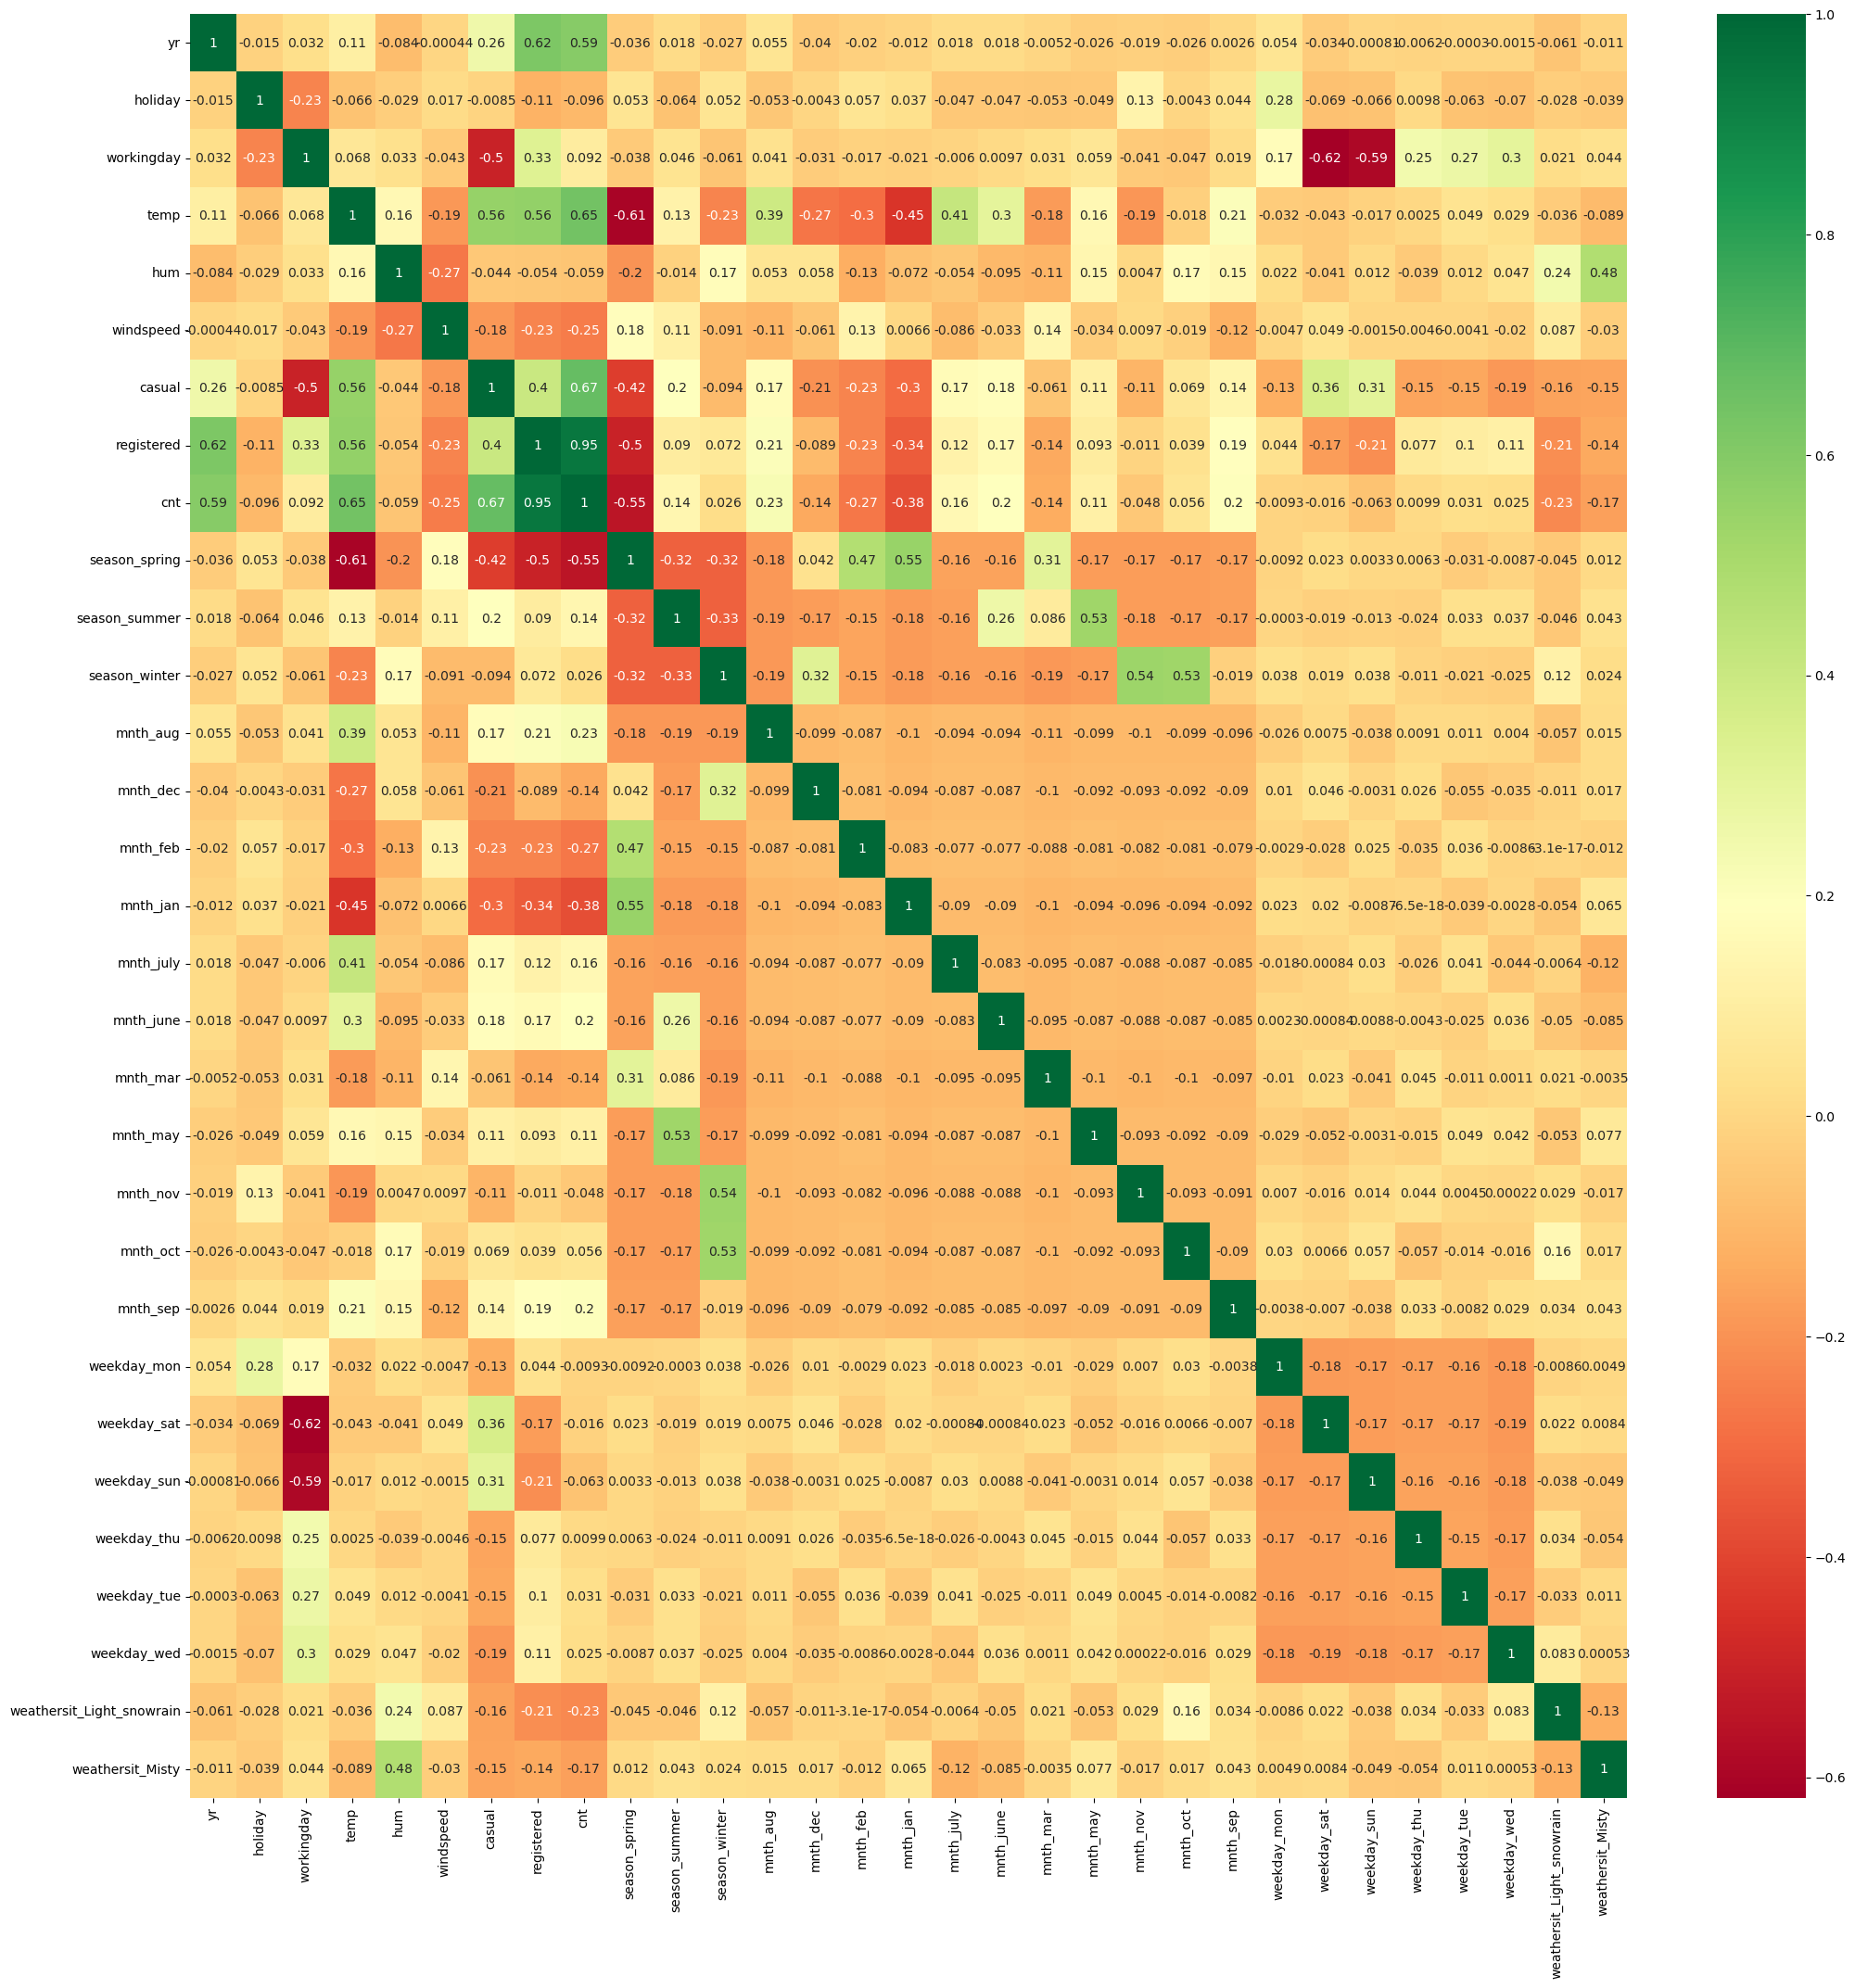

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Heatmap Insights:-

- cnt seems to have correlation with year variable and temp the most.

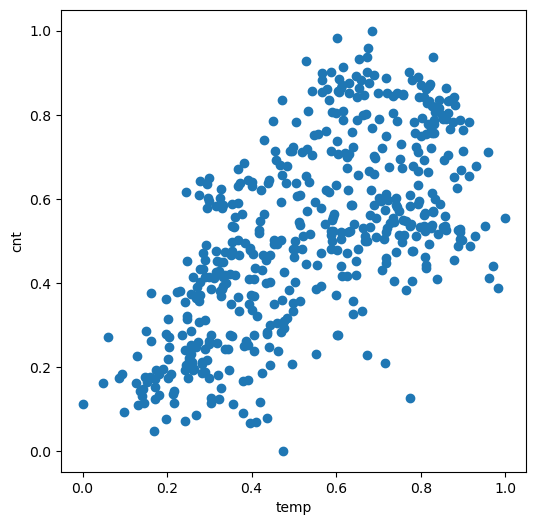

In [35]:
# Visualizing the correlation between cnt and temp to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()

### Step 6:- Training the model

#### Dividing into X and y sets for the model building

In [36]:
# X_train, y_train
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [37]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  season_spring  \
576   1        0           1  0.815169  0.725633   0.264686              0   
426   1        0           0  0.442393  0.640189   0.255342              1   
728   1        0           0  0.245101  0.498067   0.663106              1   
482   1        0           0  0.395666  0.504508   0.188475              0   
111   0        0           1  0.345824  0.751824   0.380981              0   

     season_summer  season_winter  mnth_aug  ...  mnth_oct  mnth_sep  \
576              0              0         0  ...         0         0   
426              0              0         0  ...         0         0   
728              0              0         0  ...         0         0   
482              1              0         0  ...         0         0   
111              1              0         0  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            1            0            0   
482            0            1            0            0            0   
111            0            0            0            0            0   

     weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
576            0                          0                 0  
426            0                          0                 1  
728            0                          0                 0  
482            0                          0                 1  
111            0                          0                 1  

[5 rows x 28 columns]

In [38]:
X_train.shape

(510, 28)

In [39]:
y_train.shape

(510,)

#### Building the first model with all the features

In [40]:
# add a constant
X_train_lm = sm.add_constant(X_train)

# create first model
lr = sm.OLS(y_train, X_train_lm).fit()

# params
lr.params

const                        0.243106
yr                           0.232438
holiday                      0.010042
workingday                   0.096177
temp                         0.445359
hum                         -0.151473
windspeed                   -0.186010
season_spring               -0.044834
season_summer                0.043002
season_winter                0.107632
mnth_aug                     0.020376
mnth_dec                    -0.044277
mnth_feb                    -0.032441
mnth_jan                    -0.063315
mnth_july                   -0.033848
mnth_june                    0.004602
mnth_mar                     0.001274
mnth_may                     0.024673
mnth_nov                    -0.039879
mnth_oct                     0.007546
mnth_sep                     0.085938
weekday_mon                 -0.020931
weekday_sat                  0.095554
weekday_sun                  0.041333
weekday_thu                 -0.009131
weekday_tue                 -0.017931
weekday_wed 

In [41]:
# summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        16:56:58   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2431      0.035      6.888      0.000       0.174       0.312
yr                            0.2324      0.008     28.819      0.000       0.217       0.248
holiday                       0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                    0.0962      0.012      7.835      0.000       0.072       0.120
temp                          0.4454      0.046      9.628      0.000       0.354       0.536
hum                          -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                    -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring                -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer                 0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter                 0.1076      0.028      3.853      0.000       0.053       0.163
mnth_aug                      0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_dec                     -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_feb                     -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_jan                     -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_july                    -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_june                     0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_mar                      0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_may                      0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_nov                     -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_oct                      0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_sep                      0.0859      0.032      2.692      0.007       0.023       0.149
weekday_mon                  -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_sat                   0.0956      0.014      6.958      0.000       0.069       0.123
weekday_sun                   0.0413      0.014      2.964      0.003       0.014       0.069
weekday_thu                  -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_tue                  -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_wed                  -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light_snowrain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Misty             -0.0596      0.010     -5.709      0.000      -0.080      -0.039
===========================================================================

- This model has an Adjusted R-squared value of **84.5%** which looks pretty good.
- But P-value of holiday, mnth_aug, mnth_june, mnth_mar, mnth_oct, weekday_thu, weekday_wed seems high values.

In [42]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23243754 -0.05073413  0.03540022  0.44535871 -0.15147327 -0.18601045
 -0.04483403  0.04300172  0.10763159  0.02037626 -0.04427668 -0.03244123
 -0.06331466 -0.03384783  0.00460238  0.00127429  0.02467305 -0.03987901
  0.007546    0.08593786 -0.02093099  0.03477707 -0.01944316 -0.0091306
 -0.01793105 -0.0054951  -0.25583483 -0.05955091]
0.30388280286819064


#### Model Building Using RFE

Build a model using recursive feature elimination to select features.

In [44]:
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 12  1  8  1  7 10
  9 11  1  1]


In [45]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  yr  holiday  workingday      temp       hum  windspeed  \
576    1.0   1        0           1  0.815169  0.725633   0.264686   
426    1.0   1        0           0  0.442393  0.640189   0.255342   
728    1.0   1        0           0  0.245101  0.498067   0.663106   
482    1.0   1        0           0  0.395666  0.504508   0.188475   
111    1.0   0        0           1  0.345824  0.751824   0.380981   

     season_spring  season_summer  season_winter  mnth_jan  mnth_july  \
576              0              0              0         0          1   
426              1              0              0         0          0   
728              1              0              0         0          0   
482              0              1              0         0          0   
111              0              1              0         0          0   

     mnth_sep  weekday_sat  weathersit_Light_snowrain  weathersit_Misty  
576         0            0                          0                 0  
426         0            1                          0                 1  
728         0            0                          0                 0  
482         0            1                          0                 1  
111         0            0                          0                 1

In [46]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        16:57:20   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Check for the multicollinearity among these variables

In [47]:
a=X_train_rfe1.drop('const',axis=1)

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                         hum  29.37
3                        temp  17.78
2                  workingday   5.31
5                   windspeed   4.73
6               season_spring   4.53
8               season_winter   3.46
7               season_summer   2.85
14           weathersit_Misty   2.29
0                          yr   2.09
12                weekday_sat   1.98
9                    mnth_jan   1.67
10                  mnth_july   1.59
11                   mnth_sep   1.39
13  weathersit_Light_snowrain   1.24
1                     holiday   1.18

In [49]:
# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=7,step=1)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_) 

[ True  True False  True  True  True False False  True False False False
 False False False False False False False False False False False False
 False False  True False]
[ 1  1  8  1  1  1  5  3  1 14 11 12  9  4 21 22 13 10 20  2 16  7 15 18
 17 19  1  6]


In [50]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

const  yr  holiday      temp       hum  windspeed  season_winter  \
576    1.0   1        0  0.815169  0.725633   0.264686              0   
426    1.0   1        0  0.442393  0.640189   0.255342              0   
728    1.0   1        0  0.245101  0.498067   0.663106              0   
482    1.0   1        0  0.395666  0.504508   0.188475              0   
111    1.0   0        0  0.345824  0.751824   0.380981              0   

     weathersit_Light_snowrain  
576                          0  
426                          0  
728                          0  
482                          0  
111                          0

In [59]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     281.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.78e-169
Time:                        16:41:52   Log-Likelihood:                 445.46
No. Observations:                 510   AIC:                            -874.9
Df Residuals:                     502   BIC:                            -841.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Check the VIF for these selected features**

In [51]:
b=X_train_rfe2.drop('const',axis=1)

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                        hum  9.80
2                       temp  6.87
4                  windspeed  3.42
0                         yr  2.01
5              season_winter  1.48
6  weathersit_Light_snowrain  1.08
1                    holiday  1.03

- All the variables have p-value < 0.05 and from the p-value perspective
- All variables seem significant. But there are a few variables which have VIF > 5 like hum, temp. 

In [53]:
# Drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

const  yr  holiday      temp  windspeed  season_winter  \
576    1.0   1        0  0.815169   0.264686              0   
426    1.0   1        0  0.442393   0.255342              0   
728    1.0   1        0  0.245101   0.663106              0   
482    1.0   1        0  0.395666   0.188475              0   
111    1.0   0        0  0.345824   0.380981              0   
..     ...  ..      ...       ...        ...            ...   
578    1.0   1        0  0.863973   0.187140              0   
53     1.0   0        0  0.202618   0.111379              0   
350    1.0   0        0  0.248216   0.431816              1   
79     1.0   0        0  0.462664   0.529881              0   
520    1.0   1        0  0.600225   0.359599              0   

     weathersit_Light_snowrain  
576                          0  
426                          0  
728                          0  
482                          0  
111                          0  
..                         ...  
578                          0  
53                           0  
350                          0  
79                           0  
520                          0  

[510 rows x 7 columns]

In [54]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     292.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.93e-160
Time:                        16:58:31   Log-Likelihood:                 421.78
No. Observations:                 510   AIC:                            -829.6
Df Residuals:                     503   BIC:                            -799.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Check VIF again**

In [55]:
c=X_train_rfe2.drop('const',axis=1)

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                       temp  3.07
3                  windspeed  2.81
0                         yr  2.00
4              season_winter  1.24
5  weathersit_Light_snowrain  1.06
1                    holiday  1.03

- `All the VIF values and p-values seem to be fine now (VIF < 5)`

### Step 7:- Residual Analysis

In [57]:
y_train_pred = lm3.predict(X_train_rfe2)
y_train_pred

576    0.786943
426    0.564246
728    0.389539
482    0.545380
111    0.256162
         ...   
578    0.826947
53     0.207250
350    0.293021
79     0.305857
520    0.644720
Length: 510, dtype: float64

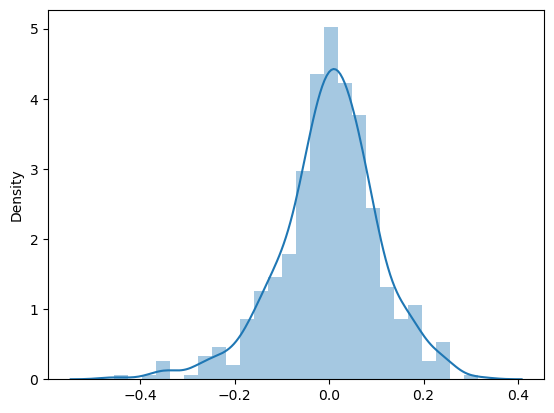

In [58]:
# Plot the histogram of the error terms
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

The error terms seems normally distributed. Now make predictions on the test-set.

### Step 8:- Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [59]:
var

['temp', 'hum', 'windspeed', 'cnt']

#### Applying the scaling on the test sets

In [60]:
df_test[var] = scaler.transform(df_test[var])

In [61]:
df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.638221    0.313293   
std      0.500809    0.187620    0.459303    0.233187    0.148694    0.159584   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.355429    0.529197    0.198843   
50%      0.000000    0.000000    1.000000    0.558172    0.625590    0.300126   
75%      1.000000    0.000000    1.000000    0.755981    0.743798    0.402718   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474   

            casual   registered         cnt  season_spring  ...    mnth_oct  \
count   220.000000   220.000000  220.000000     220.000000  ...  220.000000   
mean    876.177273  3684.381818    0.522154       0.254545  ...    0.086364   
std     711.161138  1518.870624    0.219163       0.436599  ...    0.281541   
min       9.000000   432.000000    0.048205       0.000000  ...    0.000000   
25%     338.250000  2507.750000    0.378595       0.000000  ...    0.000000   
50%     741.000000  3674.000000    0.524678       0.000000  ...    0.000000   
75%    1189.000000  4640.250000    0.677750       1.000000  ...    0.000000   
max    3410.000000  6844.000000    0.963300       1.000000  ...    1.000000   

         mnth_sep  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
count  220.000000   220.000000   220.000000   220.000000   220.000000   
mean     0.086364     0.127273     0.118182     0.145455     0.163636   
std      0.281541     0.334038     0.323559     0.353363     0.370789   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_tue  weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
count   220.000000   220.000000                 220.000000        220.000000  
mean      0.168182     0.100000                   0.027273          0.318182  
std       0.374881     0.300684                   0.163248          0.466833  
min       0.000000     0.000000                   0.000000          0.000000  
25%       0.000000     0.000000                   0.000000          0.000000  
50%       0.000000     0.000000                   0.000000          0.000000  
75%       0.000000     0.000000                   0.000000          1.000000  
max       1.000000     1.000000                   1.000000          1.000000  

[8 rows x 31 columns]

#### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
X_test.head()

yr  holiday  workingday      temp       hum  windspeed  casual  \
184   0        1           0  0.831783  0.657364   0.084219    3065   
535   1        0           1  0.901354  0.610133   0.153728     872   
299   0        0           1  0.511964  0.837699   0.334206     240   
221   0        0           1  0.881625  0.437098   0.339570     884   
152   0        0           1  0.817246  0.314298   0.537414     736   

     registered  season_spring  season_summer  ...  mnth_oct  mnth_sep  \
184        2978              0              0  ...         0         0   
535        5339              0              1  ...         0         0   
299        2419              0              0  ...         1         0   
221        3896              0              0  ...         0         0   
152        4232              0              1  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
184            1            0            0            0            0   
535            0            0            0            0            0   
299            0            0            0            1            0   
221            0            0            0            0            0   
152            0            0            0            1            0   

     weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
184            0                          0                 1  
535            1                          0                 0  
299            0                          0                 1  
221            1                          0                 0  
152            0                          0                 0  

[5 rows x 30 columns]

In [64]:
c.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_winter',
       'weathersit_Light_snowrain'],
      dtype='object')

In [65]:
X_test_rfe1 = X_test[c.columns]

In [66]:
X_test_rfe1.head()

yr  holiday      temp  windspeed  season_winter  \
184   0        1  0.831783   0.084219              0   
535   1        0  0.901354   0.153728              0   
299   0        0  0.511964   0.334206              1   
221   0        0  0.881625   0.339570              0   
152   0        0  0.817246   0.537414              0   

     weathersit_Light_snowrain  
184                          0  
535                          0  
299                          0  
221                          0  
152                          0

In [67]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe1)

In [68]:
# Making predictions
y_test_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

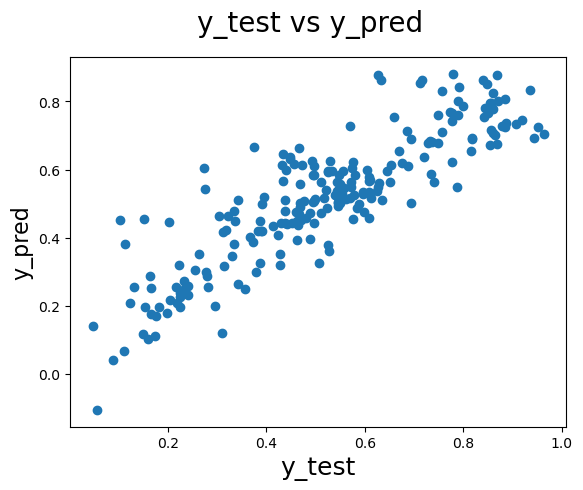

In [69]:
# Plotting scatter plot for y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

Text(0, 0.5, 'y_pred')

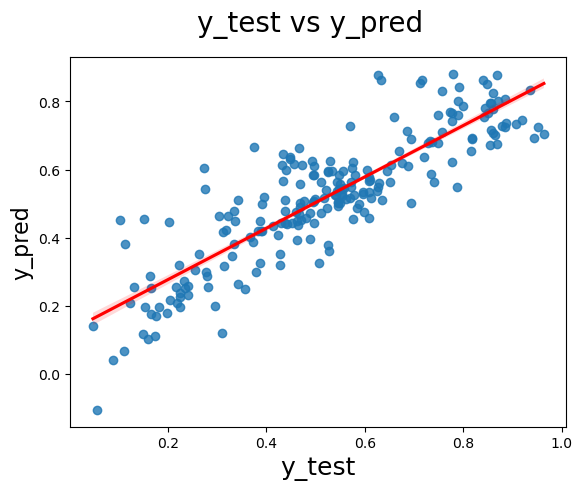

In [70]:
# Plotting reg plot for y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

From the above plots, it's evident that the model is doing well on the test set as well. Now check the R-squared and the adjusted R-squared value for the test set.

In [72]:
# evaluate
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7518412352015954

#### Adjusted R^2 Value for Test

In [73]:
# Get the shape of X_test
X_test.shape

(220, 30)

In [74]:
# n is number of rows in X_test
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7124509550748646

Thus, for the model with 6 variables, the r-squared on training and test data is about 77.7% and 75.18% respectively. The adjusted r-squared on the train set and test set is about is about 77.3% and 71.2%.

### Demand of bikes depend on year, holiday, temp, windspeed, Light_snowrain, winter.